In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

D:\Python3.10\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

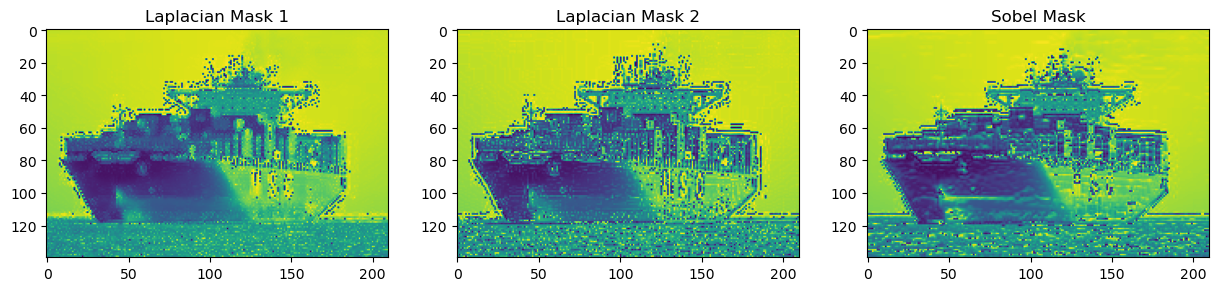

In [4]:
def applyLaplacian(laplacianMask, img):
    filteredImg = cv2.filter2D(img, -1, laplacianMask)
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
    return finalImg
  
def applySobel(sobelMask, img):
    filteredImg = cv2.filter2D(img, -1, sobelMask)
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))  
    return finalImg


img = cv2.imread('Data//1//2778091.jpg',0)

laplacianMask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  
final_img = applyLaplacian(laplacianMask, img)

laplacianMask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
final_img2 = applyLaplacian(laplacianMask2, img)

sobelMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
final_img3 = applySobel(sobelMask, img)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].imshow(final_img)
axs[0].set_title('Laplacian Mask 1')
axs[1].imshow(final_img2)
axs[1].set_title('Laplacian Mask 2')
axs[2].imshow(final_img3)
axs[2].set_title('Sobel Mask')
plt.show()


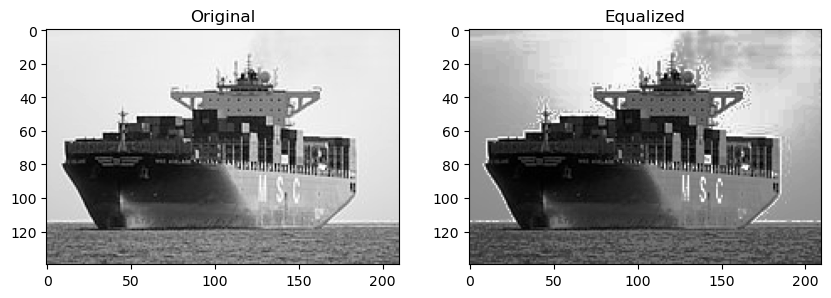

In [6]:
def hist_equalization(img):
    img = cv2.equalizeHist(img)
    return img

# 2778062

img = cv2.imread('Data//1//2778091.jpg', 0) 
# img = cv2.resize(img, (224, 224))
equ = hist_equalization(img)  

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(equ, cmap='gray')
plt.title('Equalized')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [13]:
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        count = 0
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (75, 75))  
                img = np.array(img)
                img = img / 255.0 
                images.append(img)
                labels.append(class_folder)
                count+=1
            if count == 500:
                break
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [14]:
data_dir = 'Data'
images, labels = load_and_preprocess_data(data_dir)

In [15]:
print(images[0].shape)

(75, 75, 3)


In [16]:
print(len(labels))

2500


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

encoded_labels[0:10]
# classes = [4,3,2,1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### CNN

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 17, 17, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)         

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, stratify=encoded_labels)

In [27]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size = 100)

Epoch 1/20
18/18 [==============================] - 6s 337ms/step - loss: 1.2283 - accuracy: 0.4989 - val_loss: 1.1381 - val_accuracy: 0.5667
Epoch 2/20
18/18 [==============================] - 6s 330ms/step - loss: 1.2148 - accuracy: 0.4926 - val_loss: 1.1690 - val_accuracy: 0.5573
Epoch 3/20
18/18 [==============================] - 6s 314ms/step - loss: 1.1619 - accuracy: 0.5177 - val_loss: 1.0790 - val_accuracy: 0.6040
Epoch 4/20
18/18 [==============================] - 6s 316ms/step - loss: 1.1308 - accuracy: 0.5246 - val_loss: 1.0368 - val_accuracy: 0.5907
Epoch 5/20
18/18 [==============================] - 6s 315ms/step - loss: 1.0838 - accuracy: 0.5480 - val_loss: 1.0817 - val_accuracy: 0.5880
Epoch 6/20
18/18 [==============================] - 6s 315ms/step - loss: 1.0817 - accuracy: 0.5549 - val_loss: 1.0321 - val_accuracy: 0.6187
Epoch 7/20
18/18 [==============================] - 6s 313ms/step - loss: 1.0678 - accuracy: 0.5514 - val_loss: 1.0028 - val_accuracy: 0.6187
Epoch 

In [27]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size = 100)

Epoch 1/20
18/18 [==============================] - 6s 337ms/step - loss: 1.2283 - accuracy: 0.4989 - val_loss: 1.1381 - val_accuracy: 0.5667
Epoch 2/20
18/18 [==============================] - 6s 330ms/step - loss: 1.2148 - accuracy: 0.4926 - val_loss: 1.1690 - val_accuracy: 0.5573
Epoch 3/20
18/18 [==============================] - 6s 314ms/step - loss: 1.1619 - accuracy: 0.5177 - val_loss: 1.0790 - val_accuracy: 0.6040
Epoch 4/20
18/18 [==============================] - 6s 316ms/step - loss: 1.1308 - accuracy: 0.5246 - val_loss: 1.0368 - val_accuracy: 0.5907
Epoch 5/20
18/18 [==============================] - 6s 315ms/step - loss: 1.0838 - accuracy: 0.5480 - val_loss: 1.0817 - val_accuracy: 0.5880
Epoch 6/20
18/18 [==============================] - 6s 315ms/step - loss: 1.0817 - accuracy: 0.5549 - val_loss: 1.0321 - val_accuracy: 0.6187
Epoch 7/20
18/18 [==============================] - 6s 313ms/step - loss: 1.0678 - accuracy: 0.5514 - val_loss: 1.0028 - val_accuracy: 0.6187
Epoch 

In [29]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size = 100)

Epoch 1/30
18/18 [==============================] - 6s 336ms/step - loss: 0.7417 - accuracy: 0.6966 - val_loss: 0.8696 - val_accuracy: 0.6760
Epoch 2/30
18/18 [==============================] - 6s 332ms/step - loss: 0.7024 - accuracy: 0.7131 - val_loss: 0.8628 - val_accuracy: 0.6880
Epoch 3/30
18/18 [==============================] - 6s 322ms/step - loss: 0.6693 - accuracy: 0.7263 - val_loss: 0.8726 - val_accuracy: 0.6707
Epoch 4/30
18/18 [==============================] - 6s 322ms/step - loss: 0.6823 - accuracy: 0.7189 - val_loss: 0.9075 - val_accuracy: 0.6360
Epoch 5/30
18/18 [==============================] - 6s 352ms/step - loss: 0.7201 - accuracy: 0.7017 - val_loss: 0.8836 - val_accuracy: 0.6720
Epoch 6/30
18/18 [==============================] - 6s 352ms/step - loss: 0.6432 - accuracy: 0.7337 - val_loss: 0.9000 - val_accuracy: 0.6680
Epoch 7/30
18/18 [==============================] - 6s 329ms/step - loss: 0.6167 - accuracy: 0.7514 - val_loss: 0.8996 - val_accuracy: 0.6747
Epoch 

In [32]:
ypred = np.argmax(model.predict(X_test),axis=1)
print("Accuracy:",accuracy_score(y_test, ypred))
print("Classification Report:", classification_report(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

24/24 [==============================] - 0s 19ms/step
Accuracy: 0.6933333333333334
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.53      0.56       150
           1       0.75      0.75      0.75       150
           2       0.75      0.83      0.79       150
           3       0.73      0.72      0.73       150
           4       0.63      0.64      0.64       150

    accuracy                           0.69       750
   macro avg       0.69      0.69      0.69       750
weighted avg       0.69      0.69      0.69       750

Confusion Matrix:
 [[ 79   9  15   8  39]
 [ 11 112   2  21   4]
 [  8   2 125   5  10]
 [  3  22  14 108   3]
 [ 33   5  11   5  96]]


## using laplacian filter

In [23]:
# Loading the data 
def load_and_preprocess_data(data_dir,laplacianMask):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        count = 0
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = applyLaplacian(laplacianMask, img)
                img = cv2.resize(img, (224, 224))  
                img = np.array(img)
                img = img / 255.0  
                images.append(img)
                labels.append(class_folder)
                count+=1
            if count==500:
                break

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [24]:
data_dir = 'Data'
images_1, labels_1 = load_and_preprocess_data(data_dir,laplacianMask)

In [25]:
print(images_1[0].shape)
print(len(labels_1))

(224, 224, 3)
2500


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels_1 = label_encoder.fit_transform(labels_1)

print(encoded_labels_1[0:10])
# classes = [4,3,2,1]


[0 0 0 0 0 0 0 0 0 0]


In [27]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images_1, encoded_labels_1, test_size=0.3, stratify=encoded_labels_1)

#### CNN

In [28]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [29]:
model.fit(X_train_1, y_train_1, epochs=15, validation_data=(X_test_1, y_test_1), batch_size = 100)

Epoch 1/15
18/18 [==============================] - 85s 4s/step - loss: 1.9560 - accuracy: 0.2560 - val_loss: 1.4848 - val_accuracy: 0.3773
Epoch 2/15
18/18 [==============================] - 76s 4s/step - loss: 1.4345 - accuracy: 0.4000 - val_loss: 1.4080 - val_accuracy: 0.4280
Epoch 3/15
18/18 [==============================] - 65s 4s/step - loss: 1.3163 - accuracy: 0.4600 - val_loss: 1.3013 - val_accuracy: 0.4533
Epoch 4/15
18/18 [==============================] - 64s 4s/step - loss: 1.2371 - accuracy: 0.4943 - val_loss: 1.2444 - val_accuracy: 0.4853
Epoch 5/15
18/18 [==============================] - 64s 4s/step - loss: 1.1233 - accuracy: 0.5606 - val_loss: 1.1914 - val_accuracy: 0.5480
Epoch 6/15
18/18 [==============================] - 66s 4s/step - loss: 1.0748 - accuracy: 0.5640 - val_loss: 1.1824 - val_accuracy: 0.5427
Epoch 7/15
18/18 [==============================] - 65s 4s/step - loss: 1.0069 - accuracy: 0.6183 - val_loss: 1.1267 - val_accuracy: 0.5747
Epoch 8/15
18/18 [==

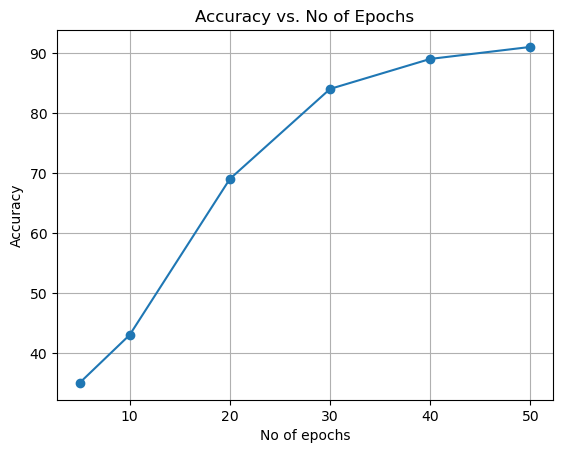

In [33]:
import matplotlib.pyplot as plt

x_values = [5, 10, 20, 30, 40, 50]
y_values = [35, 43, 69, 84, 89, 91]

plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('No of epochs')
plt.ylabel('Accuracy')

plt.title('Accuracy vs. No of Epochs')

plt.grid(True)
plt.show()
